Задание к итоговому проекту по курсу "Python для анализа данных"

Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. **satisfaction_level** - Уровень удовлетворенности работой
2. **Last_evaluation** - Время с момента последней оценки в годах
3. **number_projects** - Количество проектов, выполненных за время работы
4. **average_monthly_hours** - Среднее количество часов на рабочем месте в месяц
5. **time_spend_company** - Стаж работы в компании в годах
6. **work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. **left** - уволился ли сотрудник
8. **promotion_last_5years** - повышался ли сотрудник за последние пять лет
9. **department** - отдел в котором работает сотрудник
10. **salary** - относительный уровень зарплаты

Требуется выполнить следующее задание:
# Задание / Баллы

1 Загрузите файл HR.csv в pandas dataframe - **5 баллов**

2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение). - **10 баллов**

3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные. - **10 баллов**

4 Рассчитайте сколько сотрудников работает в каждом
департаменте. - **5 баллов**

5 Показать распределение сотрудников по зарплатам. - **5 баллов**

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности - **5 баллов**

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом - **10 баллов**

8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности) - **10 баллов**
- Доля сотрудников с повышением за последние 5 лет
-  Средняя степень удовлетворенности
- Среднее количество проектов

9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary). Оценить качество модели на тестовой выборки - **20 баллов**

10 Загрузить jupyter notebook с решение на github и прислать ссылку - **5 баллов**

Итого - **максимум 85 баллов**.

Для зачета необходимо набрать **минимум 55 баллов**.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [44]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [45]:
# 1. Загрузка файла в датафрейм
df = pd.read_csv('https://drive.google.com/u/0/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1&export=download') 
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [46]:
# 2. Расчет основных статистик для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [47]:
df.median(numeric_only = True)

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [48]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


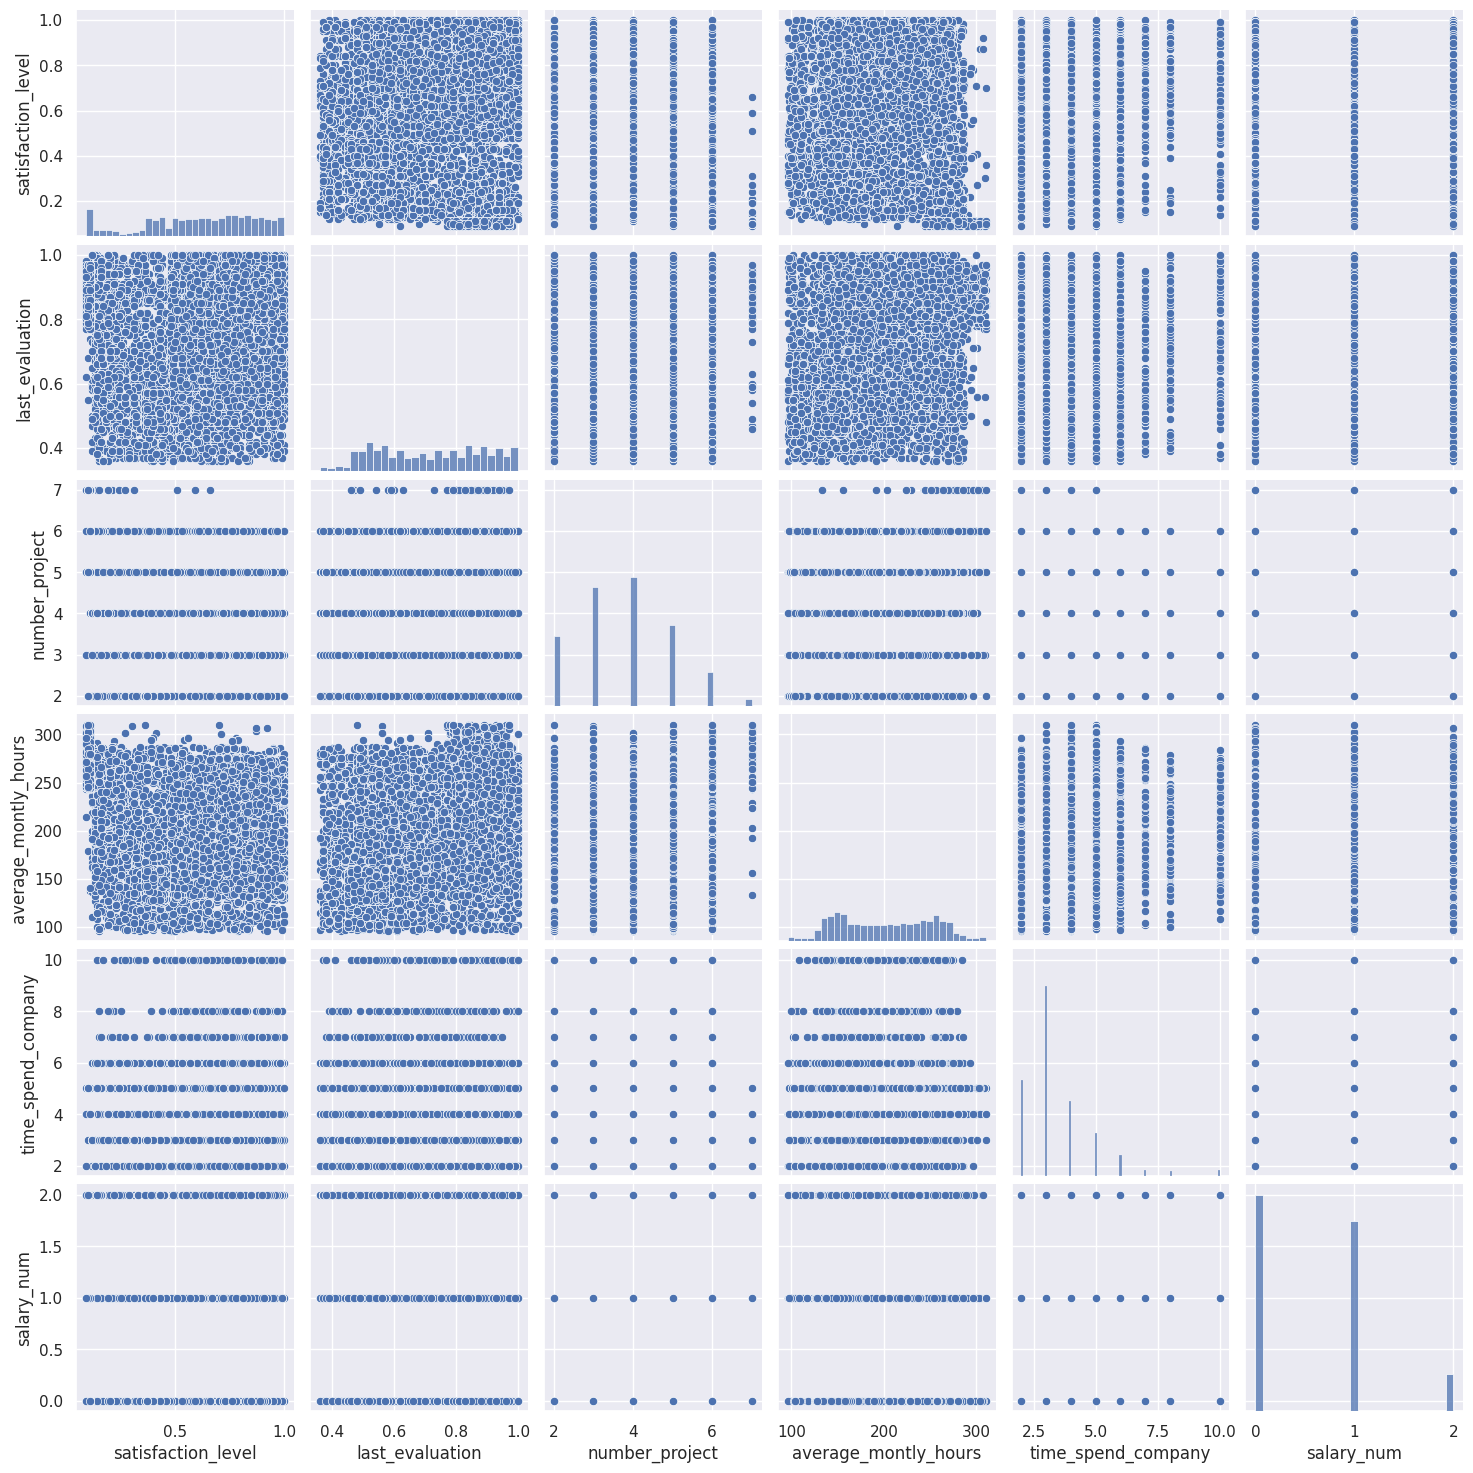

In [49]:
# 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

# Зарплата - тоже количественная переменная, потому что эти значения можно сравнить между собой и расположить на числовой прямой (low < medium < high). 
# Для удобства отображения на числовой оси заменим текстовые представления числовыми.
df_salary = df.copy()
df_salary['salary_num'] = df_salary['salary'].apply(lambda x: 0 if x == 'low' else 1 if x == 'medium' else 2)

sns.pairplot(df_salary[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'salary_num']])

<Axes: >

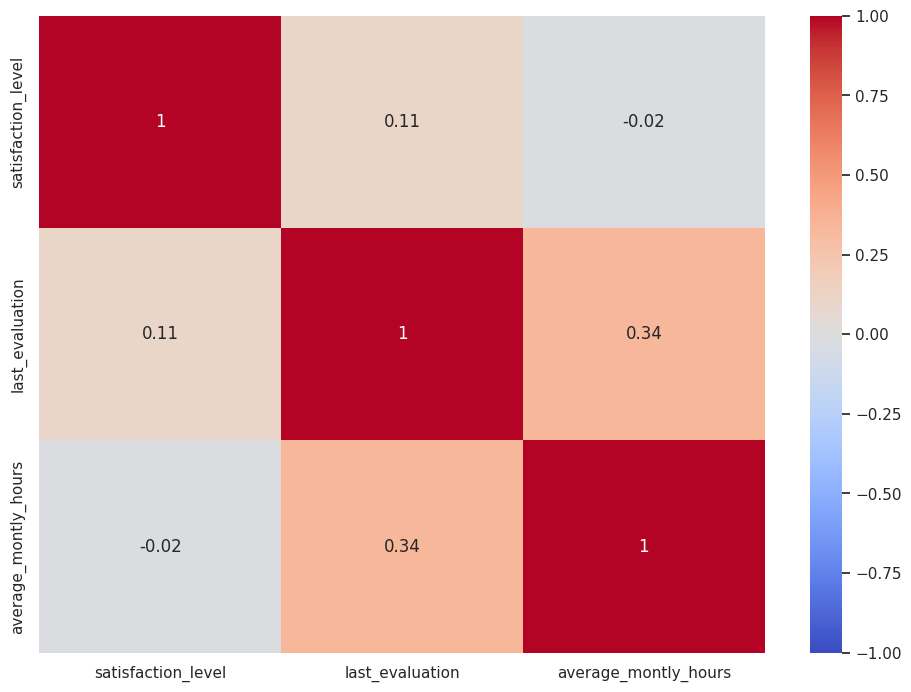

In [50]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df_salary[['satisfaction_level', 'last_evaluation', 'average_montly_hours']].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

<Axes: >

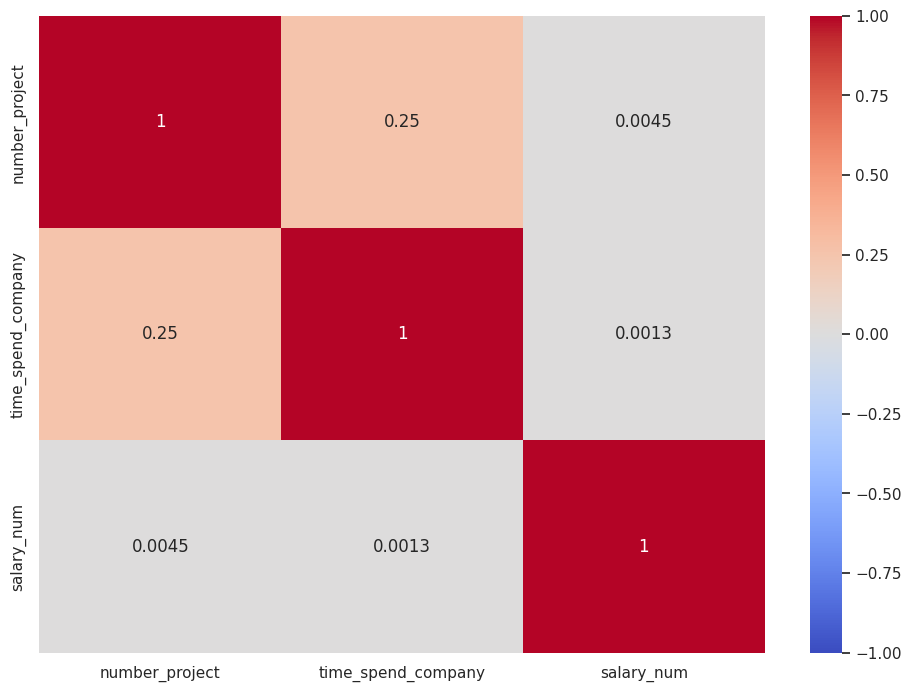

In [51]:
sns.heatmap(df_salary[['number_project', 'time_spend_company', 'salary_num']].corr(method='spearman'), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

Определите две самые скоррелированные и две наименее скоррелированные переменные.

Вывод:
- две наиболее скоррелированные переменные - 'last_evaluation', 'average_montly_hours'
- две наименее скоррелированные переменные - 'time_spend_company', 'salary_num'. 
- *Без учета столбца 'salary_num' две наименее скоррелированные переменные - 'satisfaction_level', 'average_montly_hours'.*

In [52]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте.
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0, 0.5, 'Количество сотрудников')

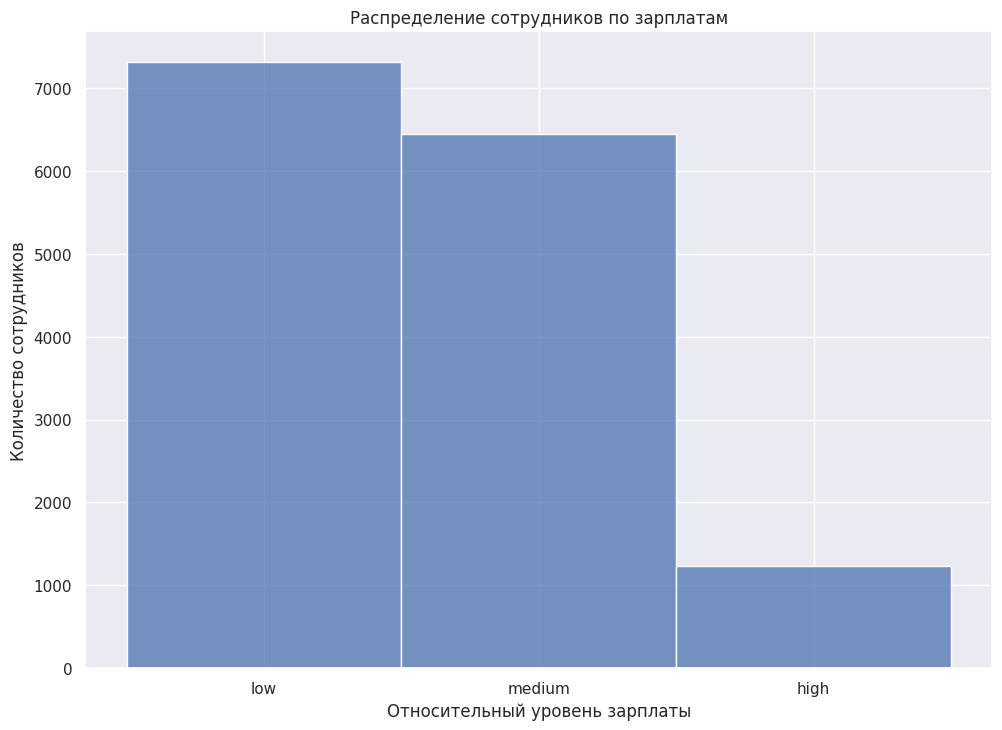

In [53]:
# 5. Показать распределение сотрудников по зарплатам.
sns.histplot(df['salary'])
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Относительный уровень зарплаты')
plt.ylabel('Количество сотрудников')

In [54]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
salary_by_department = df.groupby('department')['salary'].value_counts().unstack().sort_values(by='department', ascending=False)
salary_by_department

salary,high,low,medium
department,,,
technical,201,1372,1147
support,141,1146,942
sales,269,2099,1772
product_mng,68,451,383
marketing,80,402,376
management,225,180,225
hr,45,335,359
accounting,74,358,335
RandD,51,364,372


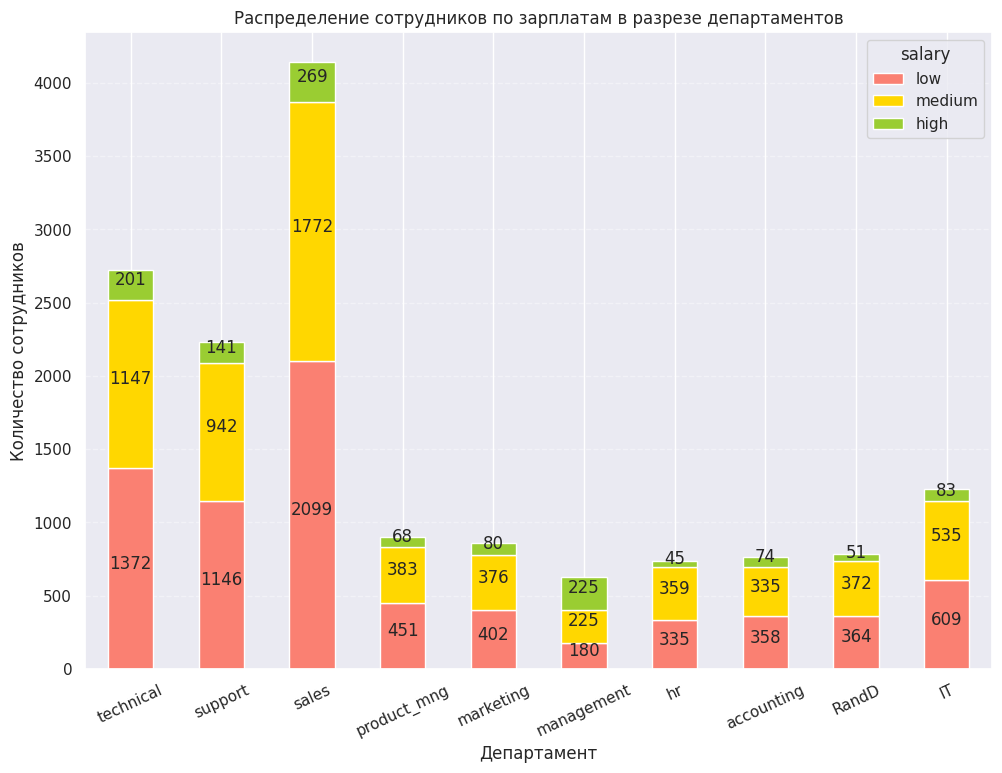

In [55]:
def addlabels(x, y, text):
    for i in range(len(x)):
        plt.text(i, y[i]//2, text[i], ha = 'center')

salary_by_department[['low', 'medium', 'high']].plot(kind='bar', stacked=True, color=['salmon', 'gold', 'yellowgreen'])
plt.title('Распределение сотрудников по зарплатам в разрезе департаментов')
plt.xlabel('Департамент')
plt.xticks(rotation = 25)
plt.ylabel('Количество сотрудников')
plt.grid(linestyle='--', alpha=0.4, axis='y')
addlabels(df.groupby('department'), salary_by_department['low'], salary_by_department['low'])
addlabels(df.groupby('department'), (salary_by_department['low'] + salary_by_department['medium']//2) * 2, salary_by_department['medium'])
addlabels(df.groupby('department'), (salary_by_department['low'] + salary_by_department['medium'] + salary_by_department['high']//2) * 2, salary_by_department['high'])

In [56]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
from scipy.stats import ttest_ind

# H0 - выборки не имеют стат. значимых различий, т.е. показатели времени, проведенного на работе, не отличаются у сотрудников с высоким и низким окладом
# H1 - выборки имеют стат. значимые различия, т.е. сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

mean_high = high_salary.mean()
mean_low = low_salary.mean()

t, p = ttest_ind(high_salary, low_salary)

print(f'Среднее значение для сотрудников с высоким окладом: {mean_high:0.2f}')
print(f'Среднее значение для сотрудников с низким окладом: {mean_low:0.2f}')
print(f't-значение: {t:0.2f}')
print(f'p-значение: {p:0.2f}')
if p <= 0.05:
  print(f'Отклоняем нулевую гипотезу. Вероятно, что есть некоторая зависимость между окладом сотрудника и временем, проведенным на работе.')
else:
  print(f'Не отклоняем нулевую гипотезу. Вероятно, что нет зависимости между окладом сотрудника и временем, проведенным на работе.')

Среднее значение для сотрудников с высоким окладом: 199.87
Среднее значение для сотрудников с низким окладом: 201.00
t-значение: -0.73
p-значение: 0.47
Не отклоняем нулевую гипотезу. Вероятно, что нет зависимости между окладом сотрудника и временем, проведенным на работе.


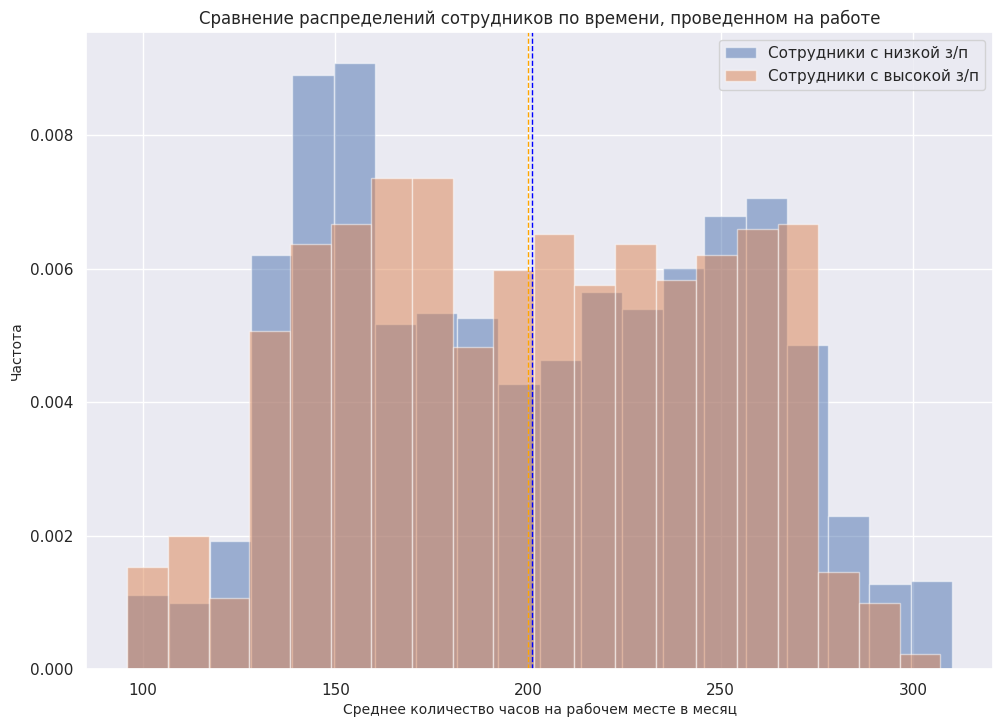

In [57]:
df['average_montly_hours'].loc[(df['salary'] == 'low')].plot(kind = 'hist', 
                     alpha = 0.5,
                     bins = 20,
                     density = True,
                     label = 'Сотрудники с низкой з/п')

df['average_montly_hours'].loc[(df['salary'] == 'high')].plot(kind = 'hist', 
                     alpha = 0.5,
                     bins = 20,
                     density = True,
                     label = 'Сотрудники с высокой з/п')
plt.legend(loc = 'upper right')
plt.title('Сравнение распределений сотрудников по времени, проведенном на работе')
plt.xlabel('Среднее количество часов на рабочем месте в месяц', fontsize = 10)
plt.ylabel('Частота', fontsize = 10)
plt.axvline(mean_high, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_low, color='blue', linestyle='dashed', linewidth=1)
#mean_high
#mean_low

In [58]:
# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности)
# а) Доля сотрудников с повышением за последние 5 лет
# б) Средняя степень удовлетворенности
# в) Среднее количество проектов

df_2 = df.groupby(['left', 'promotion_last_5years'], as_index=False).size().copy().rename(columns={'left':'Уволен', 'promotion_last_5years':'Было повышение в течении 5 лет', 'size':'Кол-во сотрудников'})
df_2['Доля (%) по группе'] = df_2['Кол-во сотрудников'] / df_2.groupby('Уволен')['Кол-во сотрудников'].transform('sum') * 100
df_2

,Уволен,Было повышение в течении 5 лет,Кол-во сотрудников,Доля (%) по группе
0,0,0,11128,97.374869
1,0,1,300,2.625131
2,1,0,3552,99.467936
3,1,1,19,0.532064


In [59]:
df_3 = df[['satisfaction_level', 'left']].groupby(['left'], as_index=False).mean('satisfaction_level').copy().rename(columns={'left':'Уволен', 'satisfaction_level':'Средняя степерь удовлетворенности'})
df_3

,Уволен,Средняя степерь удовлетворенности
0,0,0.666810
1,1,0.440098


In [60]:
df_4 = df[['number_project', 'left']].groupby(['left'], as_index=False).mean('number_project').copy().rename(columns={'left':'Уволен', 'number_project':'Среднее кол-во проектов'})
df_4

,Уволен,Среднее кол-во проектов
0,0,3.786664
1,1,3.855503


In [61]:
# 9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). 
# Оценить качество модели на тестовой выборки

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [63]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [65]:
lda = LinearDiscriminantAnalysis()

In [66]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [67]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [68]:
# Оценка качества модели по точности
accuracy_score(y_test, lda.predict(X_test))

0.7536

Точность модели предсказания увольнения сотрудника равна 75%. Приемлемо.